**You have been given an Input square matrix NxN containing certain numbers from 1 to 9.
You have to draw a snake consisting of set of continuous black cells across the matrix keeping in mind the following set of rules:**

1. The snake's tail should be at top-left of the grid. 
2. The width of the snake shall remain 1-cell only.
3. The snake's tongue should emerge out of the bottom-right of the grid.
4. The snake can consist of horizontal and vertical components.
5. The snake cannot touch or cross itself.
6. The sum of the digits in white cells (non-snake cells) should be the
   same for all rows and columns.

# Input

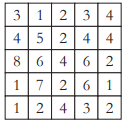

In [10]:
#Please do not tamper with this variable
Input=[[3,1,2,3,4],
       [4,5,2,4,4],
       [8,6,4,6,2],
       [1,7,2,6,1],
       [1,2,4,3,2]]

# Output

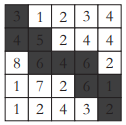

**Your solution should be stored in an Output matrix in the following format where in X denotes the snake cells and you have to print the sum of all the non-snake cells alongside the respective row.**

`Output=[[X,1,2,3,4], Sum of non-snake cells = 10
        [X,X,2,4,4],  Sum of non-snake cells = 10
        [8,X,X,X,2],  Sum of non-snake cells = 10
        [1,7,2,X,X],  Sum of non-snake cells = 10
        [1,2,4,3,X]]  Sum of non-snake cells = 10
`       


#### Please write the detailed pseudo-code in the cell below before writing the code

In [11]:
import numpy as np
N=len(Input)
white_sum = -1
drop_arr = np.zeros(N+1, dtype = int)-1

def find(arr, x): 
    for i in range(0,len(arr)):
        if arr[i]==x:
            return i
    return -1



In [12]:
def SnakeSolver():
    
    #possible sums of first row
    psumF = np.zeros(N,dtype = int)
    for i in range(0, N): #snake ends at i
        for j in range(i+1,N): #add numbers after i
            psumF[i]+=Input[0][j]
    
    #possible sums of middle rows
    psumR = np.zeros([N,N,N],dtype = int)-1
    for l in range(1,N-1): #rows 1,2,..N-1
        for k in range (0,N): #snake starts at k
            for i in range(k, N): #snake ends at i
                psumR[l][k][i]+=1
                for j in range(i+1,N):#add numbers after the snake ends
                    psumR[l][k][i]+=Input[l][j]
                for h in range(0,k):#add numbers before the snake starts
                    psumR[l][k][i]+=Input[l][h]
                    
    #possible sums of last row                
    psumL = np.zeros(N,dtype = int)
    for k in range(0, N): #snake starts at k
        for j in range(0,k): #add numbers before k
            psumL[k]+=Input[N-1][j]
    
    #common elements of possible sums of first row and second row
    psumFL = np.zeros(N, dtype=int)-1
    for i in range(0,N):
        if find(psumL[i:N], psumF[i]) > -1:
            psumFL[i]=psumF[i] 
    
    #check for middle rows
    for i in range(0,N): #loop through common elements
        if psumFL[i]>-1:
            k=np.zeros(N+1, dtype = int)
            k[1]=i
            k[N]=N-1
            for j in range(1,N-1): #loop through the possible sum in middle rows
                k[j+1]=find(psumR[j][k[j]],psumFL[i]) #if element is there, record drop at corresponding position
                if k[j+1]==-1: #not finding it in next row
                    break
            if find(k,-1)==-1: #no error was recorded in the drops
                white_sum = psumFL[i]
                drop_arr = k
                break
    return(white_sum, drop_arr)

In [13]:
def printSolution():
    X = np.full([N, N], 'X')
    Output = Input
    for i in range(0,N):
        Output[i][drop_arr[i]:(drop_arr[i+1]+1)]=X[i][drop_arr[i]:(drop_arr[i+1]+1)]
    
    string = "Sum of non-snake cells = " + str(white_sum)
    FinalOutput = np.full([N, 2], string)
    for i in range(0,N):
        FinalOutput[i,0] = str(Output[i])
    print(FinalOutput)

In [14]:
(white_sum, drop_arr) = SnakeSolver()
printSolution()

[0 0 1 3 4 4]
[["['X', 1, 2, 3, 4]" 'Sum of non-snake cells = 10']
 ["['X', 'X', 2, 4, 4]" 'Sum of non-snake cells = 10']
 ["[8, 'X', 'X', 'X', 2]" 'Sum of non-snake cells = 10']
 ["[1, 7, 2, 'X', 'X']" 'Sum of non-snake cells = 10']
 ["[1, 2, 4, 3, 'X']" 'Sum of non-snake cells = 10']]
